<a href="https://colab.research.google.com/github/swkim01/DSAC5/blob/main/gg-23-yolov8_youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ultralytics Yolov8 ÏÑ§Ïπò

In [ ]:
!pip install ultralytics

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 701.1/701.1 kB 3.5 MB/s eta 0:00:00


# Inference Ïã§Ìñâ Ìï¥Î≥¥Í∏∞

In [ ]:
import cv2
from ultralytics import YOLO

# Load a model
# model = YOLO("yolov8n.pt")  # COCO datasetÏúºÎ°ú pretrainedÎêú modelÏùÑ Î∂àÎü¨Ïò®Îã§. ÌÅ¨Í∏∞Ïóê Îî∞ÎùºÏÑú 5Í∞úÏùò Î™®Îç∏ Ï°¥Ïû¨(n, s, m, l, x)
model = YOLO("yolov8n-seg.pt")

# Use the model
results = model("https://ultralytics.com/images/bus.jpg", conf = 0.6)  # ultralytics Ìå®ÌÇ§ÏßÄ ÎÇ¥Ïóê testÏö©ÏúºÎ°ú Ïù¥ÎØ∏ Ï°¥Ïû¨Ìï¥ ÏûàÎäî Î≤ÑÏä§ Ïù¥ÎØ∏ÏßÄÎ•º Ïù¥Ïö©Ìï¥ object detection ÏàòÌñâ


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 3 persons, 1 bus, 11.1ms
Speed: 3.2ms preprocess, 11.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)


In [ ]:
# print(results)

print(results[0])

print()

# print(results[0].cpu())
print(results[0].boxes) # Ï¢åÏÉÅÎã® Ï¢åÌëú, Ïö∞ÌïòÎã® Ï¢åÌëú, confidence score, class id

seg = results[0].masks
print(seg) # segmentation Ï†ïÎ≥¥



ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair

In [ ]:
print(len(seg.xy))

for i in range(len(seg.xy)):
  seg_list = seg.xy[i]
  result = seg_list[int(len(seg_list)/2)]

  print(seg_list)

4
[[     804.94       391.5]
 [     794.81      401.62]
 [     794.81      403.31]
 [     791.44      406.69]
 [     791.44      408.38]
 [     789.75      410.06]
 [     789.75      423.56]
 [     788.06      425.25]
 [     788.06      430.31]
 [     789.75         432]
 [     789.75       445.5]
 [     791.44      447.19]
 [     791.44      450.56]
 [     793.12      452.25]
 [     793.12      453.94]
 [     794.81      455.62]
 [     794.81      465.75]
 [     793.12      467.44]
 [     793.12      469.12]
 [     789.75       472.5]
 [     789.75      475.88]
 [     788.06      477.56]
 [     788.06      479.25]
 [     786.38      480.94]
 [     786.38      482.62]
 [     784.69      484.31]
 [     784.69         486]
 [        783      487.69]
 [        783      489.38]
 [     777.94      494.44]
 [     777.94      496.12]
 [     776.25      497.81]
 [     776.25      501.19]
 [     774.56      502.88]
 [     774.56      506.25]
 [     772.88      507.94]
 [     772.88      509.62]

In [ ]:
import numpy as np

dst = seg.xy[0].copy()

shape = seg.orig_shape
print(shape)


(1080, 810)


In [ ]:
zero_mask = np.zeros(shape[1], shape[0]) # mask Ï†ïÎ≥¥Îäî 2Ï∞®Ïõê ÏÑ†Ìò∏
masked_polygon = cv2.fillPoly(zero_mask, [seg.xy[0]], 1)

cv2.imshow(masked_polygon)

gray = cv2.cvtColor(seg.xy[0], cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in contours:
    M = cv2.moments(i)
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])

    cv2.circle(dst, (cX, cY), 3, (255, 0, 0), -1)
    cv2.drawContours(dst, [i], 0, (0, 0, 255), 2)

cv2.imshow("dst", dst)

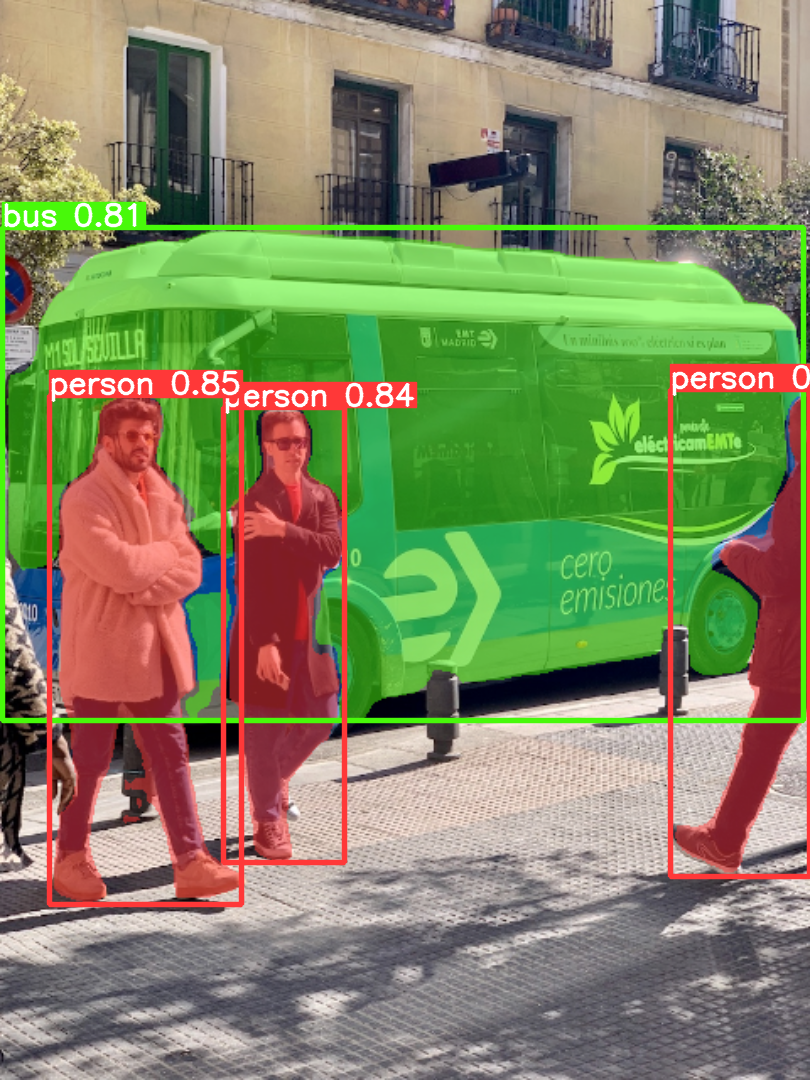

In [ ]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # googleÏùò ÏûêÏ≤¥ Í∞úÎ∞ú ÎùºÏù¥Î∏åÎü¨Î¶¨ÏóêÏÑú cv2_imshowÎ•º import

res_plotted = results[0].plot() # plot() Ìï®ÏàòÎ•º Ïù¥Ïö©Ìï¥ÏÑú Ïù¥ÎØ∏ÏßÄ ÎÇ¥Ïóê bounding boxÎÇò mask Îì±Ïùò result Í≤∞Í≥ºÎ•º Í∑∏Î¶¥ Ïàò O
# print(res_plotted)

# plt.figure(figsize=(12, 12))
# plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
# plt.show()

cv2_imshow(res_plotted)


In [ ]:
!mkdir /content/data
!wget -O /content/data/street01.jpg https://raw.githubusercontent.com/goodhsm2000/DL-YOLOv8_ex/main/street.jpg

--2023-11-09 14:46:16--  https://raw.githubusercontent.com/goodhsm2000/DL-YOLOv8_ex/main/street.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61771 (60K) [image/jpeg]
Saving to: ‚Äò/content/data/street01.jpg‚Äô

/content/data/stree 100%[===================>]  60.32K  --.-KB/s    in 0.008s  

2023-11-09 14:46:16 (7.27 MB/s) - ‚Äò/content/data/street01.jpg‚Äô saved [61771/61771]




image 1/1 /content/data/street01.jpg: 448x640 6 persons, 1 bicycle, 1 car, 21.7ms
Speed: 4.6ms preprocess, 21.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


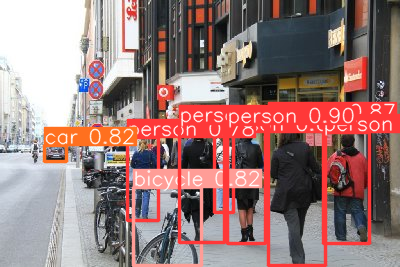

In [ ]:
results2 = model("/content/data/street01.jpg", conf = 0.5, save = True, line_width = 1)
cv2_imshow(results2[0].plot())

# Coco128 Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµÏãúÏºúÎ≥¥Í∏∞Í∏∞


In [ ]:
model.train(data="coco128.yaml", epochs=5, imgsz=640)

Ultralytics YOLOv8.0.86 üöÄ Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=Fals

# fish image datasetÏúºÎ°ú ÌïôÏäµÏãúÏºú ÌÖåÏä§Ìä∏Ìï¥Î≥¥Í∏∞


In [ ]:
# Google Drive Ï†ëÍ∑ºÏùÑ ÏúÑÌïú Mount Ï†ÅÏö©.
import os, sys
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# soft linkÎ°ú Google Drive Directory Ïó∞Í≤∞.
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 best.pt
 cam_ws
 Classroom
'Colab Notebooks'
'jwz-oork-gir - 2022·ÑÇ·Öß·Ü´ 5·Ñã·ÖØ·ÜØ 17·Ñã·Öµ·ÜØ.gjam'
 Kalma_Filter_study
 mando_AIhub_workdir
 mando_best.pt
 mando_data2.zip
 mando_data.zip
 mando_final_dataset
 mando_final.pt
 mando_traffic_dataset
 mando_traffic_light_train_workdir
 mando_traffic_light_train_workdir2
'mando_traffic_light_train_workdir3(data_combine)'
'My Drive'
 New_Sample.zip
'One fifth ·ÑÄ·Ö°·Üº·Ñã·Ö¥ ·Ñå·Ö°·ÑÖ·Ö≠-20231028T134055Z-001.zip'
 pet_work_dir
'R-biz ·ÑÉ·Ö¢·Ñí·Ö¨(2024·ÑÇ·Öß·Ü´ ·Ñã·ÖÆ·Ñâ·Ö≥·Üº·Ñã·Ö≠·Üº)'
'Screencast 2023-10-03 16:16:36.mp4'
 Selection_005.png
 ultra_workdir
 usb_cam-ros2
'·ÑÄ·ÖÆ·Ü®·ÑÜ·Öµ·Ü´·ÑÉ·Ö¢ ·Ñå·Ö°·Ñã·Ö≤·ÜØ·Ñå·ÖÆ·Ñí·Ö¢·Üº ·ÑÉ·Ö¢·Ñí·Ö¨'
'·Ñá·Ö¢·ÑÉ·Ö°·ÜØ·Ñã·Ö¥ ·ÑÜ·Öµ·Ü´·Ñå·Ö©·Ü® ·Ñë·ÖÆ·ÑÉ·Ö≥ ·ÑÉ·Öµ·ÜØ·ÑÖ·Öµ·Ñá·Ö•·ÑÖ·Öµ ·Ñé·Ö¢·ÜØ·ÑÖ·Öµ·Ü´·Ñå·Öµ ·Ñê·Öµ·Ü∑ ·Ñâ·Ö©·ÑÄ·Ö¢·Ñâ·Ö•.pptx'
'·Ñâ·Ö•·Ü´·Ñí·Öß·Üº·ÑÉ·Ö¢·Ñâ·ÖÆ ·ÑÄ·Ö°·Üº·Ñã·Ö¥·Ñâ·Ö©·ÑÄ·Ö¢(·Ñã·Ö≥·Ü∑·Ñâ·Ö•·Üº)·Ñã·Ö¥ ·Ñâ·Ö°·Ñá·Ö©·Ü´ (1).pptx'
'·Ñâ·Ö•·Ü´·Ñí·Öß·Üº·ÑÉ·Ö¢·Ñâ·ÖÆ ·ÑÄ·Ö°·Üº·Ñã·

In [ ]:
!mkdir "/mydrive/ultra_workdir"

mkdir: cannot create directory ‚Äò/mydrive/ultra_workdir‚Äô: File exists


In [ ]:
!wget -O /content/data/fishdata.zip https://raw.githubusercontent.com/goodhsm2000/DL-YOLOv8_ex/main/Fish.v44i.yolov8.zip
!cd /content/data; unzip fishdata.zip

--2023-06-23 06:22:34--  https://raw.githubusercontent.com/goodhsm2000/DL-YOLOv8_ex/main/Fish.v44i.yolov8.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10263078 (9.8M) [application/zip]
Saving to: ‚Äò/content/data/fishdata.zip‚Äô

/content/data/fishd 100%[===================>]   9.79M  --.-KB/s    in 0.09s   

2023-06-23 06:22:35 (104 MB/s) - ‚Äò/content/data/fishdata.zip‚Äô saved [10263078/10263078]

Archive:  fishdata.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/FishDataset119_png.rf.284121324d9226b1cac95b514b4938f2.jpg  
 extracting: test/images/FishDataset12_png.rf.d4e77f24b058cbd5bccdb2ea0f03c043.jpg  
 ext

In [ ]:
model = YOLO("yolov8n.pt")

model.train(data = "/content/data/data.yaml", epochs = 15, imgsz = 640, project = "/content/gdrive/MyDrive/ultra_workdir", name= "fish", exist_ok = True)

# !yolo detect train data=/content/data/data.yaml model=yolov8n.pt epochs=15 imgsz=640 project=/content/gdrive/MyDrive/ultra_workdir name= fish

Ultralytics YOLOv8.0.86 üöÄ Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data/data.yaml, epochs=15, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/gdrive/MyDrive/ultra_workdir, name=fish, exist_ok=True, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fal


image 1/1 /content/data/test/images/FishDataset508_png.rf.9c62c3be09fa9f6422f7f2c5e477ac1f.jpg: 416x640 1 Shark -Selachimorpha-, 7.5ms
Speed: 2.0ms preprocess, 7.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


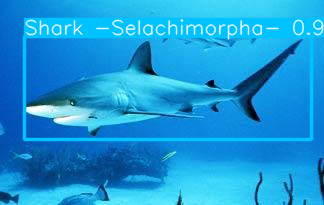

In [ ]:
model = YOLO("/content/gdrive/MyDrive/ultra_workdir/fish/weights/best.pt")

results = model.predict("/content/data/test/images/FishDataset508_png.rf.9c62c3be09fa9f6422f7f2c5e477ac1f.jpg", line_width = 2)

res_plot = results[0].plot()

cv2_imshow(res_plot) # Í≤∞Í≥º Ï∂úÎ†•ÌïòÍ∏∞